In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [27]:
x= np.random.rand(10,2)
x

array([[0.67259408, 0.95428304],
       [0.65485917, 0.83666294],
       [0.09815366, 0.8465751 ],
       [0.0299908 , 0.91453945],
       [0.71021093, 0.92951707],
       [0.29531681, 0.07328138],
       [0.54954382, 0.61049182],
       [0.57192627, 0.1182896 ],
       [0.69336404, 0.79751871],
       [0.17263853, 0.74645437]])

In [28]:
x1= 1+2*np.random.rand(5,2)
x1

array([[1.76733455, 1.17852487],
       [1.78632553, 2.11471454],
       [2.03448104, 1.38991256],
       [1.72067265, 1.24651403],
       [2.37406436, 2.4805526 ]])

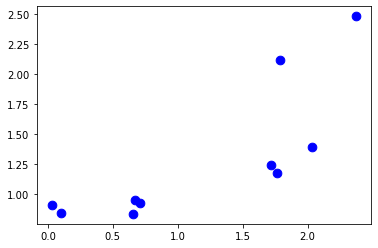

In [43]:
x[5:10,:]=x1
plt.scatter(x[:,0],x[:,1],c='b',s=75)

plt.show()

In [44]:
kmean=KMeans(n_clusters=2)
kmean.fit(x)

KMeans(n_clusters=2)

In [46]:
kmean.cluster_centers_

array([[0.43316173, 0.89631552],
       [1.93657563, 1.68204372]])

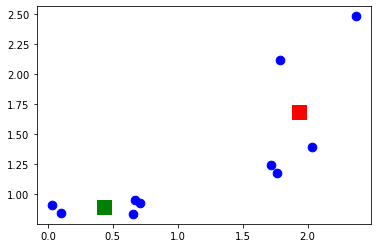

In [51]:
plt.scatter(x[:,0],x[:,1],c='b',s=75)
plt.scatter(0.43316173, 0.89631552,s=200,c='g',marker='s')
plt.scatter(1.93657563, 1.68204372,s=200,c='r',marker='s')


In [66]:
kmean.labels_

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [73]:
sample_test=np.array([1,1])
second_test=sample_test.reshape(1,-1)


In [74]:
kmean.predict(second_test)

array([0])

***basic example***

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

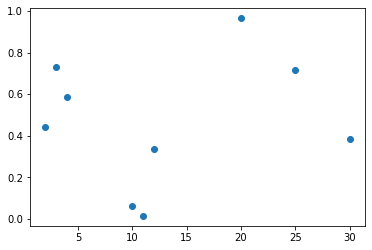

In [27]:
x=[[2,3,4,10,11,12,20,25,30]]
y=np.random.rand(9,1)
plt.scatter(x,y)

In [34]:
k=2
Centroids=(x.sample(n=k))
plt.scatter(x,y)
plt.scatter(centroids[x],centroids[y])
plt.show

AttributeError: 'list' object has no attribute 'sample'

In [66]:
***how to make clusters***

SyntaxError: invalid syntax (<ipython-input-66-9b292e5237a9>, line 1)

In [37]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
data = pd.read_csv(r'C:\Users\DELL\Downloads\clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


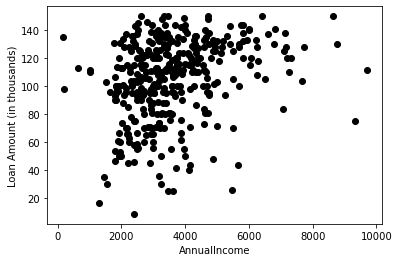

In [43]:

X = data[["LoanAmount","ApplicantIncome"]]
#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (in thousands)')
plt.show()

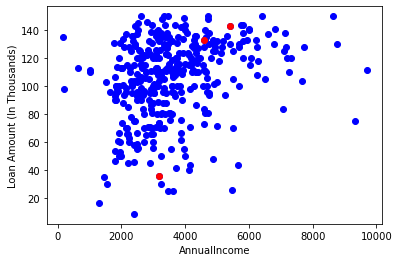

In [49]:
#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='blue')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [52]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

<ipython-input-52-7e498e144d8d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-52-7e498e144d8d>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


0.0


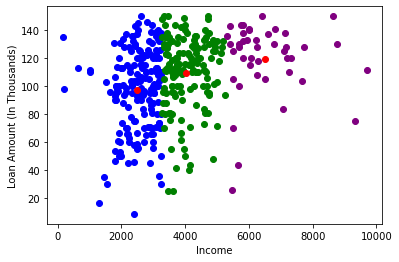

In [59]:
color=['blue','green','purple']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()